## Assignment 1: Principal Component Analysis

a. Read the data in from the file `alpha-helix-starts-4-5.dat` and remove rows that contain NA values (`dropna`). The delimiter is a space (delimiter=' ') and there is no header (header=None), but that is stuff assumed known. It may be a good idea to remove columns with only zeroes.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('alpha-helix-starts-4-5.dat.gz', sep='\s+', header=None).dropna()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2ng1,1,1,EEE~~HHHH,7.57,11.40,5.71,4.63,9.11,6.50,...,0.0,-3.80,-0.0,0.0,-3.92,3.78,-0.0,-1.38,4.12,-2.76
1,2ng1,1,2,G~SS~HHHH,-3.42,2.00,12.34,-1.94,1.85,8.84,...,0.0,-3.80,-0.0,0.0,-4.25,3.75,0.0,-1.44,4.21,-2.43
2,2ng1,1,3,GGGTTHHHH,2.62,-2.14,9.38,3.95,-1.09,5.98,...,0.0,-3.80,0.0,0.0,-3.88,3.81,-0.0,-2.54,4.27,-3.54
3,2ng1,1,4,~SS~~HHHH,-0.22,9.06,6.19,2.88,8.88,8.41,...,0.0,-3.81,0.0,0.0,-3.94,3.80,0.0,-1.36,3.79,-2.80
4,2ng1,1,5,~TT~~HHHH,3.19,9.94,0.90,5.52,9.40,3.82,...,0.0,-3.81,-0.0,0.0,-3.70,3.79,0.0,-1.13,3.80,-2.76


The data file contains Cartesian X/Y/Z positions of carbon atoms that mark the beginning of alpha-helices, with five atoms before the helix and four atoms in it. The four atoms of the helix were used to align the structures, so they are all positioned in a consistent way. The structure ID from which the helix was extracted is in the first column, the second and third columns give chain ID and helix ID, respectively, and the fourth column shows a classification of the structure per amino acid.

b. Explain why it is or is not necessary to normalize the data for principal component analysis. 

The data are all Cartesian coordinates and they are pre-aligned, so all is consistent and the data are all equivalent. Therefor no normalization should be performed.

c. Perform principal component analysis

In [2]:
values = data.iloc[:, 4:].values
#values = values[:, values.var(axis=0) > 0] # To exclude columns with zeros, although not strictly necessary.
# - it's actually even better not to :p

vals, vecs = np.linalg.eigh(np.cov(values.T))
vecs = vecs[:, ::-1]
vals = vals[::-1]

d. Plot the eigenvalues and discuss what the graph shows (and what that means).

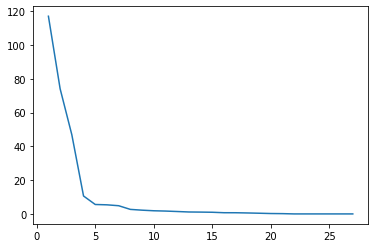

In [3]:
plt.plot(np.arange(len(vals)) + 1, vals)
plt.show()

The plot shows that only three principal components account for the greater part of the total variance. From the fourth on, the additional variance explained is small.

e. Project the data onto the eigenvalues and make plots of the projections.

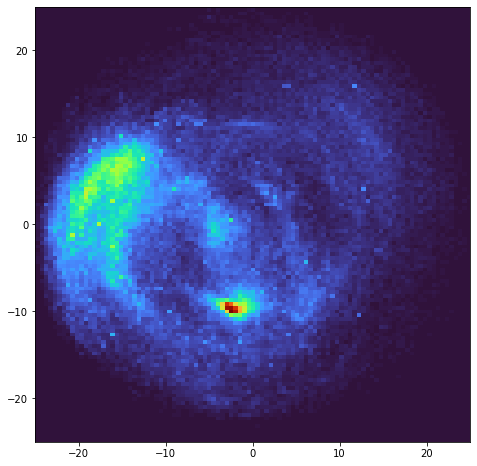

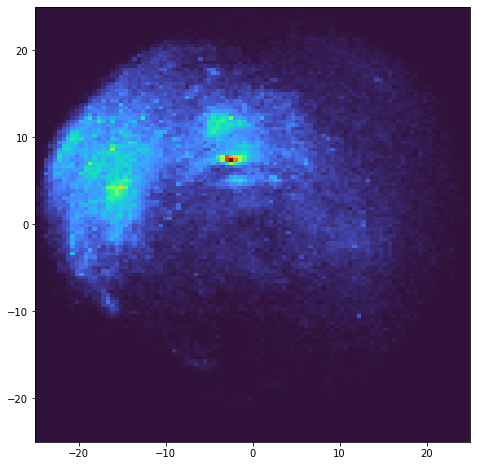

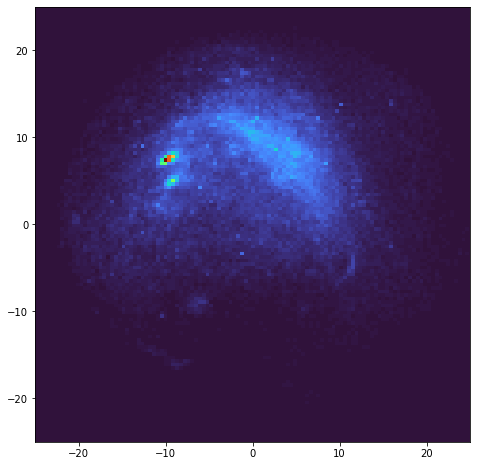

In [4]:
projections = values @ vecs

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*projections[:, :2].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*projections[:, [0, 2]].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*projections[:, [1, 2]].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()

f. Create a biplot by adding lines/arrows (you can use numbers to label the original variables)

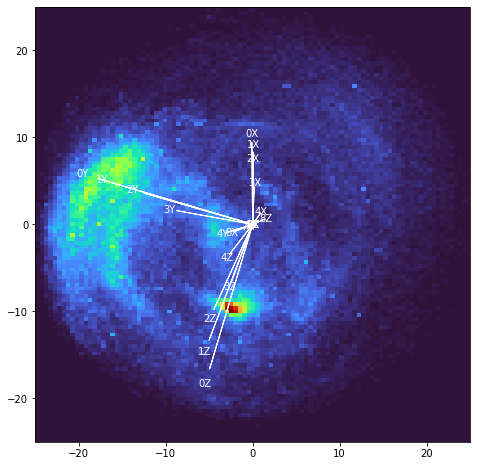

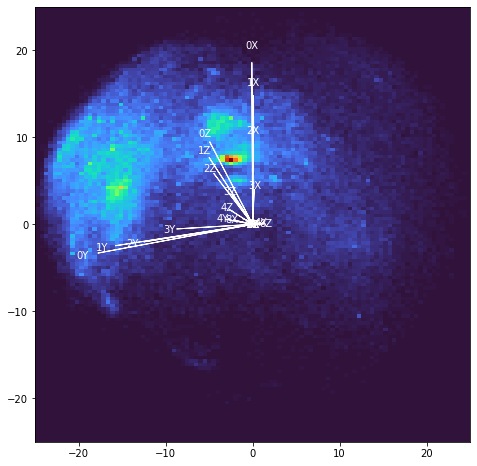

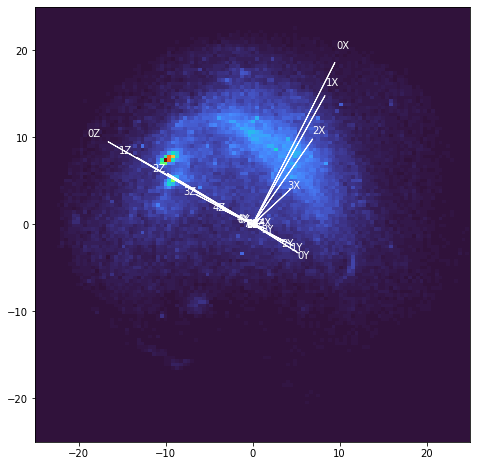

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*projections[:, :2].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
for i, (x,y) in enumerate(30 * vecs[:, :2]):
    plt.arrow(0, 0, x, y, color='white')
    plt.text(1.1*x, 1.1*y, str(i//3) + 'XYZ'[i%3], color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*projections[:, [0,2]].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
for i, (x,y) in enumerate(30 * vecs[:, [0,2]]):
    plt.arrow(0, 0, x, y, color='white')
    plt.text(1.1*x, 1.1*y, str(i//3) + 'XYZ'[i%3], color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()


fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*projections[:, [1,2]].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
for i, (x,y) in enumerate(30 * vecs[:, [1,2]]):
    plt.arrow(0, 0, x, y, color='white')
    plt.text(1.1*x, 1.1*y, str(i//3) + 'XYZ'[i%3], color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

g. Discuss what the plots from e/f show

The plots show that there is one main cluster in the space spanned by the three principal components and that there are a few minor clusters. Note that I made a close up, since there also are some points projecting outside this region (but considering the number of points in total, they are a minority). What this then shows is that the space of variance, so of conformations, is actually very limited. The arrows show that each component has a distinct pattern of loadings for the X/Y/Z components of the atoms.

h. Explain what a principal component is in this context

Since these are configurations of coordinates (atomic particles in this case), the interpretation of a component is that of overall shape change. It is worth noting that the projections are all showing circular patterns, showing that the components are still correlated non-linearly.

## Assignment 2: MultiDimensional Scaling (Principal Coordinate Analysis).

Use the data from the same data file (`alpha-helix-starts-4-5.dat`).

a. Make a selection of every 250th line from the full data table and construct a distance matrix (squared!) for this selection (If you don't know how, 1. these are Cartesian X/Y/Z, so the distance between two observations a and b is just sum((a - b)\*\*2, and 2. the matrix operations needed can be figured out by writing the equations in matrix form ... or you can use scipy functions).

In [38]:
selection = values[::100]

distmat = ((selection[:, None] - selection[None]) ** 2).sum(axis=2)

b. Perform MDS/PCoA on the distance matrix

In [39]:
m = distmat.mean(axis=0)
A = -0.5 * (distmat - m[None, :] - m[:, None] + m.mean())
vals, vecs = np.linalg.eigh(A)
vecs = vecs[:, ::-1]
vals = vals[::-1]

c. Plot the eigenvalues and discuss what the graph shows (and what that means).

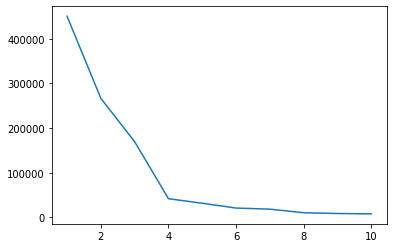

In [40]:
plt.plot(np.arange(1, 11), vals[:10])
plt.show()

d. Plot the principal coordinates obtained.

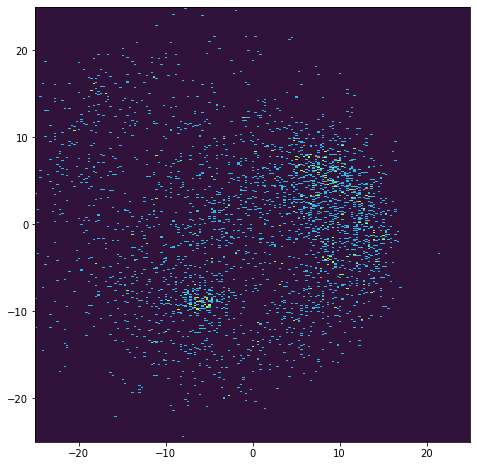

In [41]:
pcoa = vecs[:, :4] * vals[:4]**0.5

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*pcoa[:, :2].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()


e. Give an interpretation of what these principal coordinates are and what the plot shows (compare it with the eigenvector-projection plot).

The principal coordinates are coordinates that are assigned to the data point such that they approximate the distance structure from the distance matrix. The principal coordinates are scores on (possibly fictive) principal components.

## Assignment 3: Multivariate Linear Regression

If the previous assignment wasn't (yet) successful, read in the principal coordinates that were derived before from the file `pcoa.dat`. This file contains the values corresponding to every 250th line from the file `alpha-helix-starts-4-5.dat`.

a. Perform a multivariate linear regression of the principal coordinates (regressand) against the original sample data (regressor). (This gives a coefficient matrix B, such that Y = XB + E)

In [49]:
selection = selection[:, selection.var(axis=0) > 0]
X = np.concatenate([np.ones((selection.shape[0], 0)), selection], axis=1)
B = np.linalg.inv(X.T @ X) @ (X.T @ pcoa)

In [50]:
predicted = X @ B

c. Plot the data from the model against the original data and reflect on the correspondence.

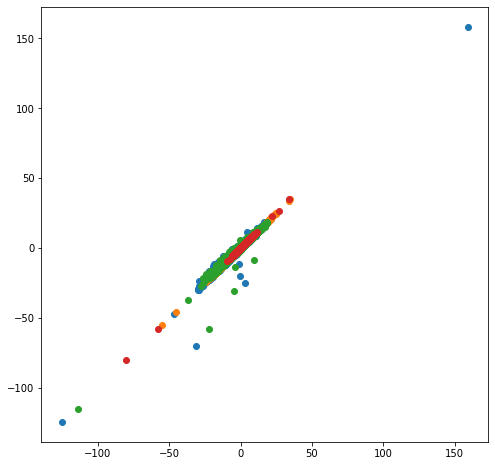

In [52]:
plt.figure(figsize=(8,8))
for i in range(4):
    plt.scatter(pcoa[:, i], predicted[:, i])
plt.show()

The relationship is pretty much linear, except for a few outliers.

d. Calculate estimated principal coordinates for _all_ data from `alpha-helix-starts-4-5.dat` (by projecting on the coefficient matrix) and plot the estimated coordinates. 

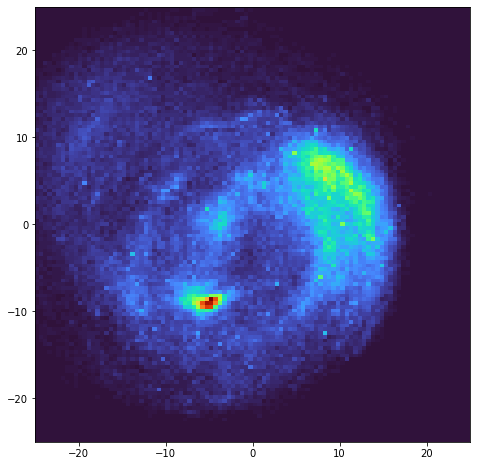

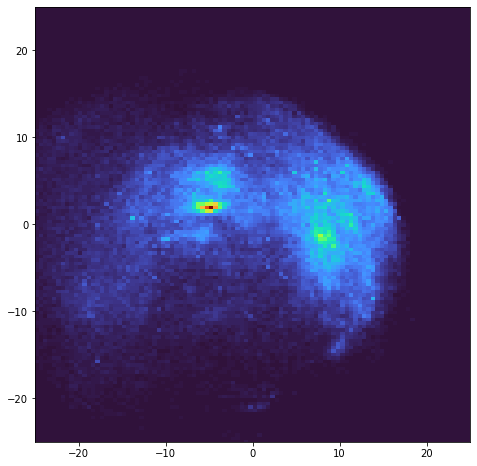

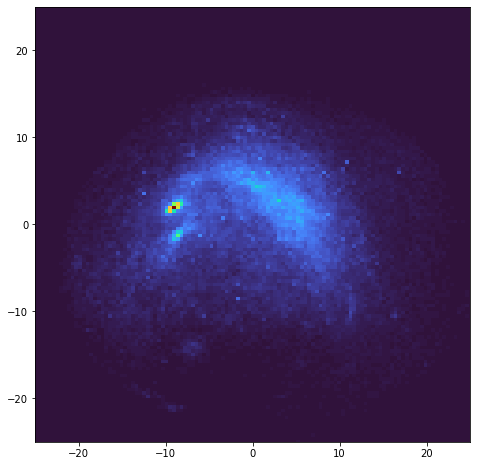

In [54]:
estimates = values[:, values.var(axis=0) > 0] @ B

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*estimates[:, :2].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*estimates[:, [0,2]].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()


fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect(1)
plt.hist2d(*estimates[:, [1,2]].T, bins=1024, cmap='turbo')
r = 25
plt.xlim((-r, r))
plt.ylim((-r, r))
plt.show()

e. Compare the plots with the ones from PCA and explain the similarities/differences.

The first two are flipped, but otherwise they are equal. Since principal components/coordinates are defined up to a sign, the plots are actually the same.